In [6]:
!rm -r /content/COBB

In [1]:
!git clone https://github.com/AHammoudeh/COBB.git

Cloning into 'COBB'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 6.04 KiB | 6.04 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip /content/annotations_trainval2017.zip

--2025-01-24 13:43:43--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.171.193, 52.217.202.81, 3.5.12.247, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.171.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  39.4MB/s    in 6.9s    

2025-01-24 13:43:51 (34.8 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  /content/annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [3]:
from pycocotools.coco import COCO

dataType='val2017' #train2017, val2017

dataDir='/content/'
annFile='{}annotations/instances_{}.json'.format(dataDir,dataType)
OBBannFile ='{}annotations/instancesOBB_{}.json'.format(dataDir,dataType)
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.25s)
creating index...
index created!


In [ ]:
from COBB.codes import get_OBB, show_obbox, annotation_items
import random
import skimage
import numpy as np

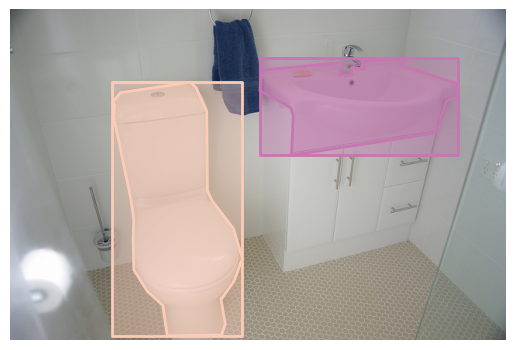

In [13]:
img_num = random.randint(0, 500)
img_id = coco.getImgIds()[img_num]  # Replace with your desired image ID

# Get image metadata
image_info = coco.loadImgs(img_id)[0]
img_path=image_info['coco_url']
annIds = coco.getAnnIds(imgIds=img_id)
anns = coco.loadAnns(annIds)
I =  skimage.io.imread(img_path)
I_plot = I.copy()

obboxes = []
for annotation in anns:
  hull, image_width, image_height = annotation_items(annotation, coco)
  selected_box=get_OBB(hull, image_width, image_height)
  annotation['obbox'] = list(np.round(selected_box,1).reshape(-1))
  obboxes.append(annotation['obbox'])

show_obbox(I_plot, coco, obboxes,  anns, with_obb=False, with_segment=True, with_regula_bb = True)

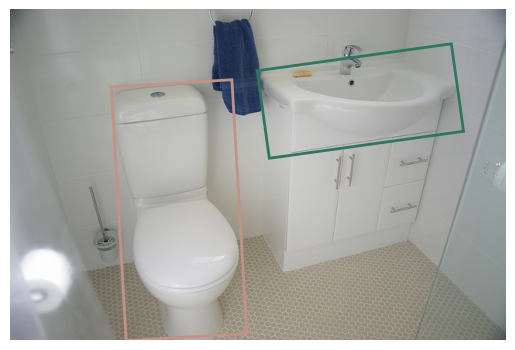

In [14]:
show_obbox(I_plot, coco, obboxes,  anns, with_obb=True, with_segment=False, with_regula_bb = False)